# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [298]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [299]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [300]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [301]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [302]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [303]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [304]:
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [305]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
2       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
3      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
4       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   
2           CA 2016-04-27 00:46:53          Grades PreK-2   
3           GA 2016-04-27 00:53:00          Grades PreK-2   
4           WA 2016-04-27 01:05:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   
2        Literacy & Language                                 Literacy   
3           Applied Learning                        Early Development   
4        Literacy & Language                                 Literacy   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   
3          Flexible Seating for Flexible Learning   
4          Going Deep: The Art of Inner Thinking!   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   
2  Having a class of 24 students comes with diver...   
3  I recently read an article about giving studen...   
4  My students crave challenge, they eat obstacle...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   
2  I have a class of twenty-four kindergarten stu...   
3  I teach at a low-income (Title 1) school. Ever...   
4  We are an urban, public k-5 elementary school....   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   
2  By having a mobile listening and storage cente...   
3  We need a classroom rug that we can use as a c...   
4  With the new common core standards that have b...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   
2  A mobile listening center will help keep equip...   
3  Benjamin Franklin once said, \"Tell me and I f...   
4  These remarkable gifts will provide students w...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   
2  My students need a mobile listening center to ...   
3  My students need flexible seating in the class...   
4  My students need copies of the New York Times ...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   
2                                            10                    1  329.00   
3                                             2                    1  481.04   
4                                             2                    1   17.74   

   quantity  
0         4  
1         8  
2         1  
3         9  
4        14

## 1.2 preprocessing of `project_subject_categories`

In [306]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.2.1 preprocessing of `project_subject_subcategories`

In [307]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

#sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))
#sorted_teacher_dict = dict(sorted(teacher_dict.items(), key=lambda kv: kv[1]))
#sorted_project_grade_dict = dict(sorted(project_grade_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of project_grade_category

In [308]:
sub_catogories = list(project_data['project_grade_category'].values)
project_grade_list = []
for i in sub_catogories:
    temp = i.replace('-','_')
    temp = temp.replace(' ','_')
    project_grade_list.append(temp.strip())
project_data['project_grade_category'] = project_grade_list

In [309]:
print(project_data['project_grade_category'].values)

['Grades_PreK_2' 'Grades_3_5' 'Grades_PreK_2' ... 'Grades_3_5'
 'Grades_9_12' 'Grades_PreK_2']


## 1.4 Text preprocessing

In [310]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [311]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades_PreK_2   
1           UT 2016-04-27 00:31:25             Grades_3_5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [312]:
print(project_data['essay'].values[99999])
print("="*50)

My classroom consists of twenty-two amazing sixth graders from different cultures and backgrounds. They are a social bunch who enjoy working in partners and working with groups. They are hard-working and eager to head to middle school next year. My job is to get them ready to make this transition and make it as smooth as possible. In order to do this, my students need to come to school every day and feel safe and ready to learn. Because they are getting ready to head to middle school, I give them lots of choice- choice on where to sit and work, the order to complete assignments, choice of projects, etc. Part of the students feeling safe is the ability for them to come into a welcoming, encouraging environment. My room is colorful and the atmosphere is casual. I want them to take ownership of the classroom because we ALL share it together. Because my time with them is limited, I want to ensure they get the most of this time and enjoy it to the best of their abilities.Currently, we have 

In [313]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [314]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [315]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [316]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [317]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [318]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:49<00:00, 644.88it/s]


In [319]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

## 1.4 Preprocessing of `project_title`

In [320]:
# similarly you can preprocess the titles also
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:07<00:00, 14181.08it/s]


In [321]:
preprocessed_title[1000]

'empowering students art learning'

## 1.5 Split the data into Train, CV and Test


#### 1.5.1 Data preparation on dataframe 

In [322]:
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved', 'quantity' ], axis=1)
X.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades_PreK_2   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   

   teacher_number_of_previously_posted_projects   price clean_categories  \
0                                            53  725.05     Math_Science   

                  clean_subcategories  \
0  AppliedSciences Health_LifeScience   

                                               essay  
0  I have been fortunate enough to use the Fairy ...

#### 1.5.2 Split data into Train, Test and CV

In [325]:
# train test split
from sklearn.model_selection import train_test_split

X = X.fillna(X['teacher_prefix'].value_counts().index[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

#Data is not splitting to CV Since I am using gridsearchCV in this assignment
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

### 1.6 Creating a Datamatrix

In [421]:
feature_names_bow = []

#### 1.6.1 Text features: Essay

##### 1.6.1.1 Text features: Essay_bow

In [422]:

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

feature_names_bow.extend(vectorizer.get_feature_names())

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)


(73196, 18) (73196,)
(36052, 18) (36052,)
After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


##### 1.6.1.2 Text features: TFIDF

In [447]:
feature_names_tfidf = []

In [448]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['essay']) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'])
X_test_essay_tfidf = vectorizer.transform(X_test['essay'])

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(73196, 14723) (73196,)
(36052, 14723) (36052,)


##### 1.6.1.3 Text features: AVGW2V

In [331]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [332]:
# average Word2Vec
# compute average word2vec for each review.
##############################################

avg_w2v_vector_X_Train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vector_X_Train_essay.append(vector)
####################################################

100%|███████████████████████████████████████████████████████████████████████████| 73196/73196 [01:42<00:00, 712.01it/s]


In [333]:
avg_w2v_vector_X_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vector_X_test_essay.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [00:38<00:00, 937.01it/s]


##### 1.6.1.4 Text features: TFIDF AVGW2V

In [334]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [335]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_train_essay.append(vector)

print(len(tfidf_w2v_vectors_X_train_essay))
print(len(tfidf_w2v_vectors_X_train_essay[0]))

100%|████████████████████████████████████████████████████████████████████████████| 73196/73196 [12:31<00:00, 97.35it/s]


73196
300


In [336]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_test_essay.append(vector)

print(len(tfidf_w2v_vectors_X_test_essay))
print(len(tfidf_w2v_vectors_X_test_essay[0]))

100%|████████████████████████████████████████████████████████████████████████████| 36052/36052 [05:58<00:00, 72.25it/s]


36052
300


#### 1.6.2 Text features: Project Title

##### 1.6.2.1 Text features: Project Title_BOW

In [423]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_bow = vectorizer.transform(X_train['project_title'].values)
X_test_project_bow = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_project_bow.shape, y_train.shape)
print(X_test_project_bow.shape, y_test.shape)
print("="*100)

feature_names_bow.extend(vectorizer.get_feature_names())

After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


##### 1.6.1.2 Text features: TFIDF

In [449]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['project_title']) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_tdidf = vectorizer.transform(X_train['project_title'])
X_test_project_tfidf = vectorizer.transform(X_test['project_title'])

print("After vectorizations")
print(X_train_project_tdidf.shape, y_train.shape)
print(X_test_project_tfidf.shape, y_test.shape)
print("="*100)

feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(73196, 2634) (73196,)
(36052, 2634) (36052,)


##### 1.6.1.3 Text features: AVGW2V

In [339]:
# average Word2Vec
# compute average word2vec for each review.
##############################################

avg_w2v_vector_X_Train_Title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vector_X_Train_Title.append(vector)
####################################################

100%|█████████████████████████████████████████████████████████████████████████| 73196/73196 [00:01<00:00, 53517.98it/s]


In [340]:
avg_w2v_vector_X_test_Title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vector_X_test_Title.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 57527.61it/s]


##### 1.6.1.4 Text features: TFIDF_AVGW2V

In [341]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [342]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_train_title.append(vector)

print(len(tfidf_w2v_vectors_X_train_title))
print(len(tfidf_w2v_vectors_X_train_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 73196/73196 [00:01<00:00, 37921.31it/s]


73196
300


In [343]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_test_Title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_test_Title.append(vector)

print(len(tfidf_w2v_vectors_X_test_Title))
print(len(tfidf_w2v_vectors_X_test_Title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 28763.83it/s]


36052
300


#### 1.6.3 catogorical features: state

In [450]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

print("="*100)

feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


#### 1.6.4 catogorical features: tearcher_prefix

In [451]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


#### 1.6.5 catogorical features: project_grade_category

In [452]:
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w\w+(?:\-\@\@\-)?\w+\b')
#vectorizer = CountVectorizer(token_pattern=r'(?u)\\b[\\w-]+\\b')
print(vectorizer)
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None,
                token_pattern='(?u)\\b\\w\\w+(?:\\-\\@\\@\\-)?\\w+\\b',
                tokenizer=None, vocabulary=None)
After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


#### 1.6.6 catogorical features: clean_categories

In [453]:
# we use count vectorizer to convert the values into one 

vectorizer = CountVectorizer()

vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_CC_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_CC_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_CC_ohe.shape, y_train.shape)
print(X_test_CC_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


#### 1.6.7 catogorical features: clean_subcategories

In [454]:
# we use count vectorizer to convert the values into one 

vectorizer = CountVectorizer()

vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_SC_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_SC_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_SC_ohe.shape, y_train.shape)
print(X_test_SC_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

feature_names_bow.extend(vectorizer.get_feature_names())
feature_names_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


#### 1.6.8 Normalizing the numerical features: Price

In [349]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))
X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

In [455]:
feature_names_bow.extend(['price'])
feature_names_tfidf.extend(['price'])

In [351]:
print(X_train_price_norm)
print(X_test_price_norm)

[[0.0001972 ]
 [0.00172439]
 [0.0017393 ]
 ...
 [0.00106453]
 [0.00131815]
 [0.00147692]]
[[3.81003423e-04]
 [1.63581687e-03]
 [7.62443150e-05]
 ...
 [1.33193037e-03]
 [8.57306785e-03]
 [3.79585431e-03]]


#### 1.6.9 Normalizing the numerical features: teacher_number_of_previously_posted_projects

In [456]:
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_previously_posted_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_previously_posted_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")

X_train_previously_posted_norm = X_train_previously_posted_norm.reshape(-1,1)
X_cv_previously_posted_norm = X_cv_previously_posted_norm.reshape(-1,1)
X_test_previously_posted_norm = X_test_previously_posted_norm.reshape(-1,1)

print(X_train_previously_posted_norm.shape, y_train.shape)
print(X_test_previously_posted_norm.shape, y_test.shape)
print("="*100)

feature_names_bow.extend(['teacher_number_of_previously_posted_projects'])
feature_names_tfidf.extend(['teacher_number_of_previously_posted_projects'])

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [353]:
print(X_train_previously_posted_norm)
print(X_test_previously_posted_norm)

[[0.00049266]
 [0.00024633]
 [0.00147797]
 ...
 [0.00455708]
 [0.00160114]
 [0.00123164]]
[[0.00088444]
 [0.00212266]
 [0.00035378]
 ...
 [0.00123822]
 [0.00017689]
 [0.00053067]]


# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Decision Tree </h1>

<h2>2.1 DT BOW </h2> 

In [357]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_BOW = hstack((X_train_essay_bow,X_train_project_bow,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_CC_ohe,X_train_SC_ohe,X_train_price_norm,X_train_previously_posted_norm)).tocsr()
X_te_BOW = hstack((X_test_essay_bow,X_test_project_bow, X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe, X_test_CC_ohe,X_test_SC_ohe, X_test_price_norm, X_test_previously_posted_norm)).tocsr()

print("Final Data matrix")
print(X_tr_BOW.shape, y_train.shape)
print(X_te_BOW.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 10101) (73196,)
(36052, 10101) (36052,)


In [358]:
from sklearn.tree import DecisionTreeClassifier
Base_Model = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}]
grid_search_BOW = GridSearchCV(estimator = Base_Model, param_grid = parameters, scoring = 'roc_auc', cv = 10, n_jobs = -1, return_train_score= True)
grid_search_BOW = grid_search_BOW.fit(X_tr_BOW, y_train)


In [403]:
#Plot heat map for Confusion matrix
# Taken Reference from https://www.kaggle.com/arindambanerjee/grid-search-simplified
def Plot_Heatmap(grid_search):
    max_depth_list = list(grid_search.cv_results_['param_max_depth'].data)
    estimators_list = list(grid_search.cv_results_['param_min_samples_split'].data)
    sns.set_style("whitegrid")
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':grid_search.cv_results_['mean_train_score']})
    data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
    sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Training data')
    plt.subplot(1,2,2)
    data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':grid_search.cv_results_['mean_test_score']})
    data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
    sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Test data')
    plt.show()

In [408]:
#Choosing the best hyperparameters which are obtained from grid search

def Chose_Best_Hyperparam(Depth, Samplestosplit, X_train, X_test):
    
    Base_Model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=Depth, min_samples_split=Samplestosplit, class_weight='balanced')
    Base_Model.fit(X_train, y_train)
    y_train_pred = Base_Model.predict_proba(X_train)[:,1]    
    y_test_pred = Base_Model.predict_proba(X_test)[:,1]

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("Alpha: hyperparameter")
    plt.ylabel("AUC")
    plt.title("Alpha: hyperparameter vs AUC")
    plt.grid()
    plt.show()
    Output = (y_train_pred,y_test_pred,train_fpr,train_tpr,tr_thresholds,test_fpr,test_tpr,te_thresholds,Base_Model)
    return Output

In [396]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [487]:
grid_search_BOW.best_params_

{'max_depth': 10, 'min_samples_split': 500}

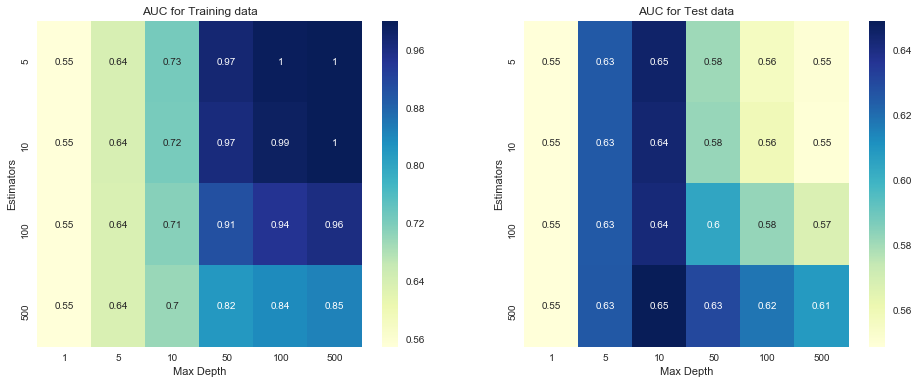

In [397]:
Plot_Heatmap(grid_search_BOW)

In [399]:
#Chosen best hyper parameter from heat map
Depth =  10
Samplestosplit = 500

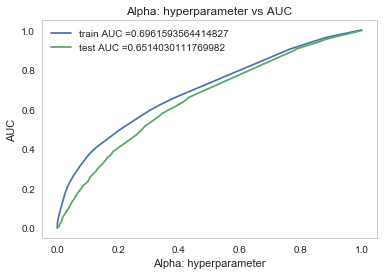

In [409]:
#Tran the model to find best Train/Test 
Threshold_Values = Chose_Best_Hyperparam(Depth, Samplestosplit, X_tr_BOW, X_te_BOW)

In [412]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

def Plot_Confusion_Matrix_Train_Test(Threshold_Values): 
    #Unpacking Tuple Values
    y_train_pred,y_test_pred,train_fpr,train_tpr,tr_thresholds,test_fpr,test_tpr,te_thresholds,Base_Model = Threshold_Values
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    CMTrain = confusion_matrix(y_train,predict_with_best_t(y_train_pred, best_t))
    plt.figure(figsize=(5.5,4))
    sns.heatmap(CMTrain, annot=True, fmt='d')
    plt.title('Confusion matrix for Train Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    CMTest = confusion_matrix(y_test,predict_with_best_t(y_test_pred, best_t))
    plt.figure(figsize=(5.5,4))
    sns.heatmap(CMTest, annot=True, fmt='d')
    plt.title('Confusion matrix for Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

the maximum value of tpr*(1-fpr) 0.41392028030908534 for threshold 0.465


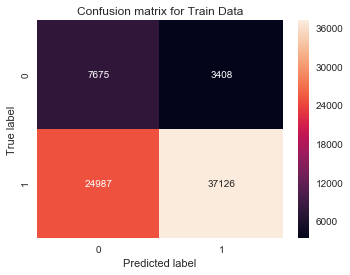

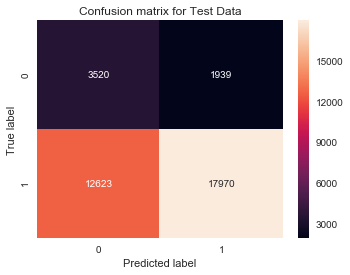

In [415]:
Plot_Confusion_Matrix_Train_Test(Threshold_Values)
y_train_pred,y_test_pred,train_fpr,train_tpr,tr_thresholds,test_fpr,test_tpr,te_thresholds,Base_Model = Threshold_Values

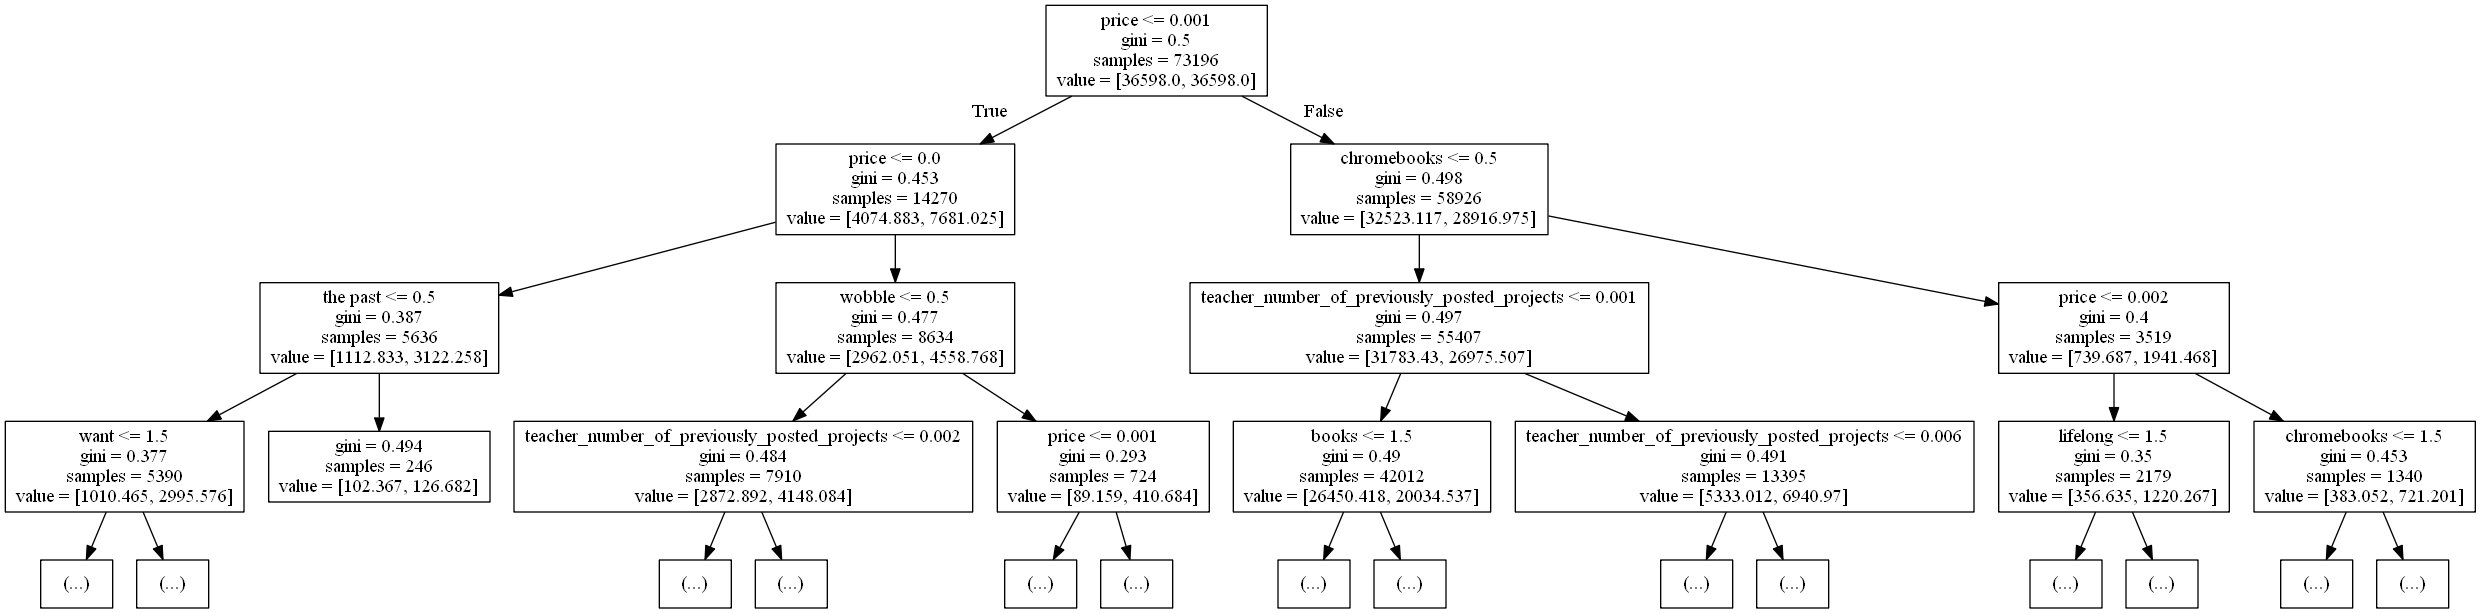

In [432]:
dot_data = StringIO()
export_graphviz(Base_Model, out_file=dot_data, max_depth=3,feature_names=feature_names_bow)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### get false positive points as below

In [433]:
X_test[(y_test == 0) & (y_test_pred == 1)]

Unnamed: 0       id                        teacher_id teacher_prefix  \
44375        11575  p066435  c3f6524092365617ade39ba03f643e8b           Mrs.   
56657        49984  p016702  fae5975b4812c5b4cd1dca42e4c1b5df            Ms.   
89290       120458  p214964  3dff2529eb2c96a8293af67d5f0f5738           Mrs.   
32759        10257  p154953  12d1346729ec40cebfcfab3ddc900831           Mrs.   
52801       137657  p189381  1f677425d4f775ce5510d13bacc20bc7            Ms.   
91669        62085  p032967  496cf6117176bb41043dfea47ec17383            Ms.   
72177        88703  p169824  637f234b30d445036292180de3955f2d            Ms.   
82735        67661  p231082  80471d76ed0d957a69a2a90eb1992437           Mrs.   
106628       33505  p101680  2fa0448668df764fb9ba2ec64fc3ce80           Mrs.   
28251         7733  p133160  a6078d82d1050e134b3a1c000f7fa209            Ms.   
71653        48923  p033427  6a6272bab0c9d89d72ad0afa17fdb9a6            Ms.   
67904        70240  p067372  07d465b336f1a6220d01e792721bb948           Mrs.   
51340       172695  p064865  cc248310d2bfd9fd4f302db97081ad5d            Mr.   
29891        67021  p233018  b94dbbcb2c446c49f8312f1557503ebd            Ms.   
67956        60795  p157762  8f814795bd86fc19d1e7b35791e29f74            Ms.   
74584        50711  p234506  17f43ac8d3cf7015bf715fe591bf43f3           Mrs.   
77191       107763  p044593  58906a66a0e30cce05d80aac89fc14ad           Mrs.   
61205       150481  p115561  2cb77d84145795856489ac901ca965cf            Ms.   
103439       37929  p066489  dd215c3345274b3074fd9d6c68dc2483            Ms.   
44532        33888  p074963  615fdc88dab888022bbdaa8ac6afe9eb           Mrs.   
70446       109591  p137696  e515e3a1de36524075af840768a8e534            Ms.   
69325       165838  p075452  1b1811b39943123260da66ae5bdd3a0d            Ms.   
14901       138990  p015964  c7df7b0c7a6a79f7e78a37435582c424            Ms.   
55974        34444  p014966  268967bf24d97114e9798641feb2e66a           Mrs.   
82098        55580  p075677  cb57b890c76f2053264421a5927aa45f            Mr.   
108174       78591  p182889  2bbab87b64bbee6ed1a353b1d20177f5            Mr.   
85317         4929  p199574  1b23f3f25bdca2cd5d057adcbb27e378           Mrs.   
51958       114204  p239341  741a057b4f874f9c2d78e55c6602fb71            Ms.   
65580        94052  p207387  5104ecfbca5902f2a9fd6922dbafe767           Mrs.   

       school_state                Date project_grade_category  \
44375            ME 2016-09-05 19:06:02             Grades_3_5   
56657            IL 2016-10-06 00:48:56             Grades_3_5   
89290            IL 2017-02-06 12:40:02          Grades_PreK_2   
32759            MS 2016-08-19 15:15:14          Grades_PreK_2   
52801            CA 2016-09-26 15:58:54            Grades_9_12   
91669            CA 2017-02-14 15:27:39            Grades_9_12   
72177            NY 2016-11-30 12:08:50          Grades_PreK_2   
82735            NC 2017-01-13 10:03:35          Grades_PreK_2   
106628           UT 2017-04-17 17:30:59             Grades_3_5   
28251            FL 2016-08-12 02:19:05             Grades_6_8   
71653            CA 2016-11-29 00:14:47             Grades_3_5   
67904            TN 2016-11-16 20:59:26            Grades_9_12   
51340            IL 2016-09-22 12:00:33          Grades_PreK_2   
29891            CA 2016-08-15 00:57:20             Grades_3_5   
67956            CA 2016-11-16 22:42:31            Grades_9_12   
74584            WY 2016-12-10 16:11:53            Grades_9_12   
77191            IL 2016-12-21 21:27:10             Grades_3_5   
61205            IL 2016-10-22 09:12:12             Grades_6_8   
103439           GA 2017-03-31 10:15:29          Grades_PreK_2   
44532            LA 2016-09-05 23:25:43          Grades_PreK_2   
70446            NY 2016-11-24 20:46:11             Grades_6_8   
69325            NY 2016-11-20 21:30:23          Grades_PreK_2   
14901            MA 2016-07-15 15:33:42          Grades_PreK_2   
55974            AR 201

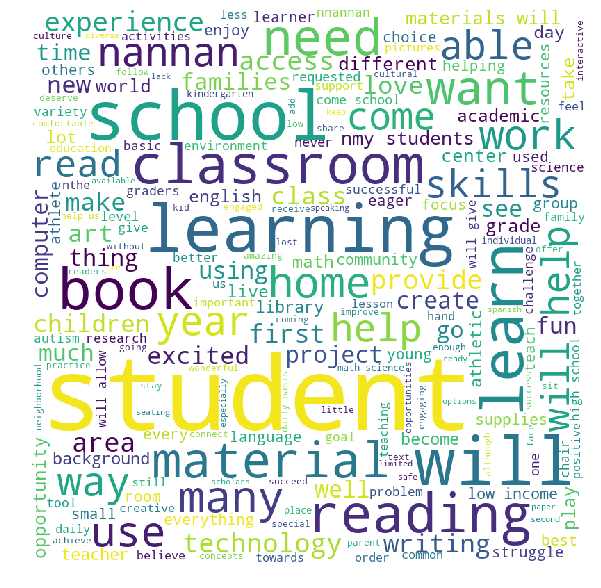

In [434]:
# Copied from geeks for geeks
# https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

df = X_test[(y_test == 0) & (y_test_pred == 1)]
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.essay: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Box Plot

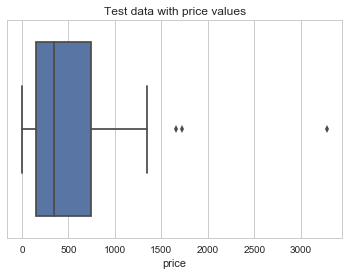

In [435]:
df.head()
sns.set(style="whitegrid")
sns.boxplot(x='price',data=df)
plt.title('Test data with price values')
plt.show()

### Summary

#### 75% of Flase positive points are less than 600
##### median with 200$

### PDF Curve

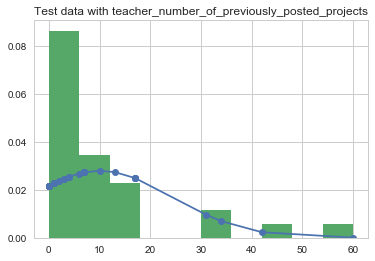

In [436]:
import numpy as np
import scipy.stats as stats
import pylab as pl
h = df["teacher_number_of_previously_posted_projects"]
h = h.sort_values()
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
pl.plot(h,fit,'-o')
pl.hist(h, normed = True)
pl.title('Test data with teacher_number_of_previously_posted_projects')
pl.show()

### Summary

Most of FP for Teachers with previously posted projects are below 20

## 2.2 DT with TFIDF

In [437]:
# Please write all the code with proper documentation
X_tr_TFIDF = hstack((X_train_essay_tfidf,X_train_project_tdidf,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,X_train_CC_ohe,X_train_SC_ohe,X_train_price_norm,X_train_previously_posted_norm)).tocsr()
X_te_TFIDF = hstack((X_test_essay_tfidf,X_test_project_tfidf,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_CC_ohe,X_test_SC_ohe, X_test_price_norm, X_test_previously_posted_norm)).tocsr()

              
print("Final Data matrix")
print(X_tr_TFIDF.shape, y_train.shape)
print(X_te_TFIDF.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 17458) (73196,)
(36052, 17458) (36052,)


In [439]:
Base_Model = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}]
grid_search_TFIDF = GridSearchCV(estimator = Base_Model, param_grid = parameters, scoring = 'roc_auc', cv = 10, n_jobs = -1,return_train_score= True)
grid_search_TFIDF = grid_search_TFIDF.fit(X_tr_TFIDF, y_train)

In [440]:
grid_search_TFIDF.best_params_

{'max_depth': 10, 'min_samples_split': 500}

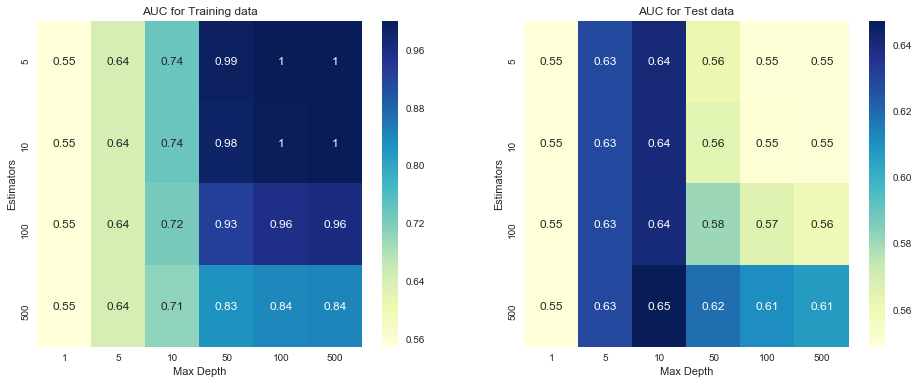

In [441]:
#Plot heat map for train and CV data
Plot_Heatmap(grid_search_TFIDF)

In [442]:
#Choose best hyper parameter from heat map
Depth =  10
Samplestosplit = 500

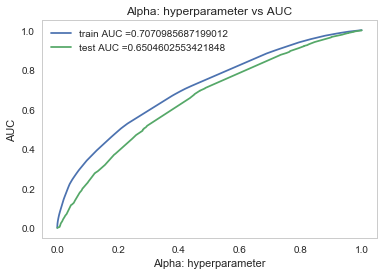

In [443]:
#Tran the model to find best Train/Test 
Threshold_Values = Chose_Best_Hyperparam(Depth, Samplestosplit, X_tr_TFIDF, X_te_TFIDF)

the maximum value of tpr*(1-fpr) 0.4162927960642394 for threshold 0.49


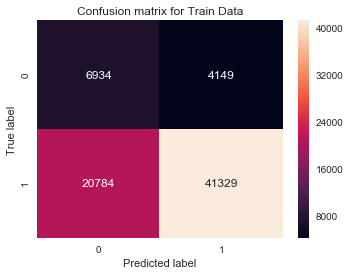

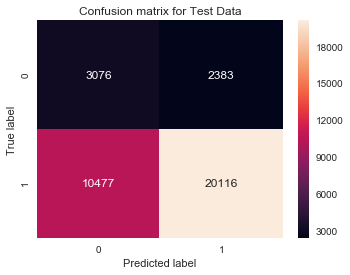

In [444]:
#Confusion matrix for Train and Test
Plot_Confusion_Matrix_Train_Test(Threshold_Values)
y_train_pred,y_test_pred,train_fpr,train_tpr,tr_thresholds,test_fpr,test_tpr,te_thresholds,Base_Model = Threshold_Values

#### Saving Important features to complete task5

In [445]:
DT_Most_Important_TF_IDF = Base_Model.feature_importances_

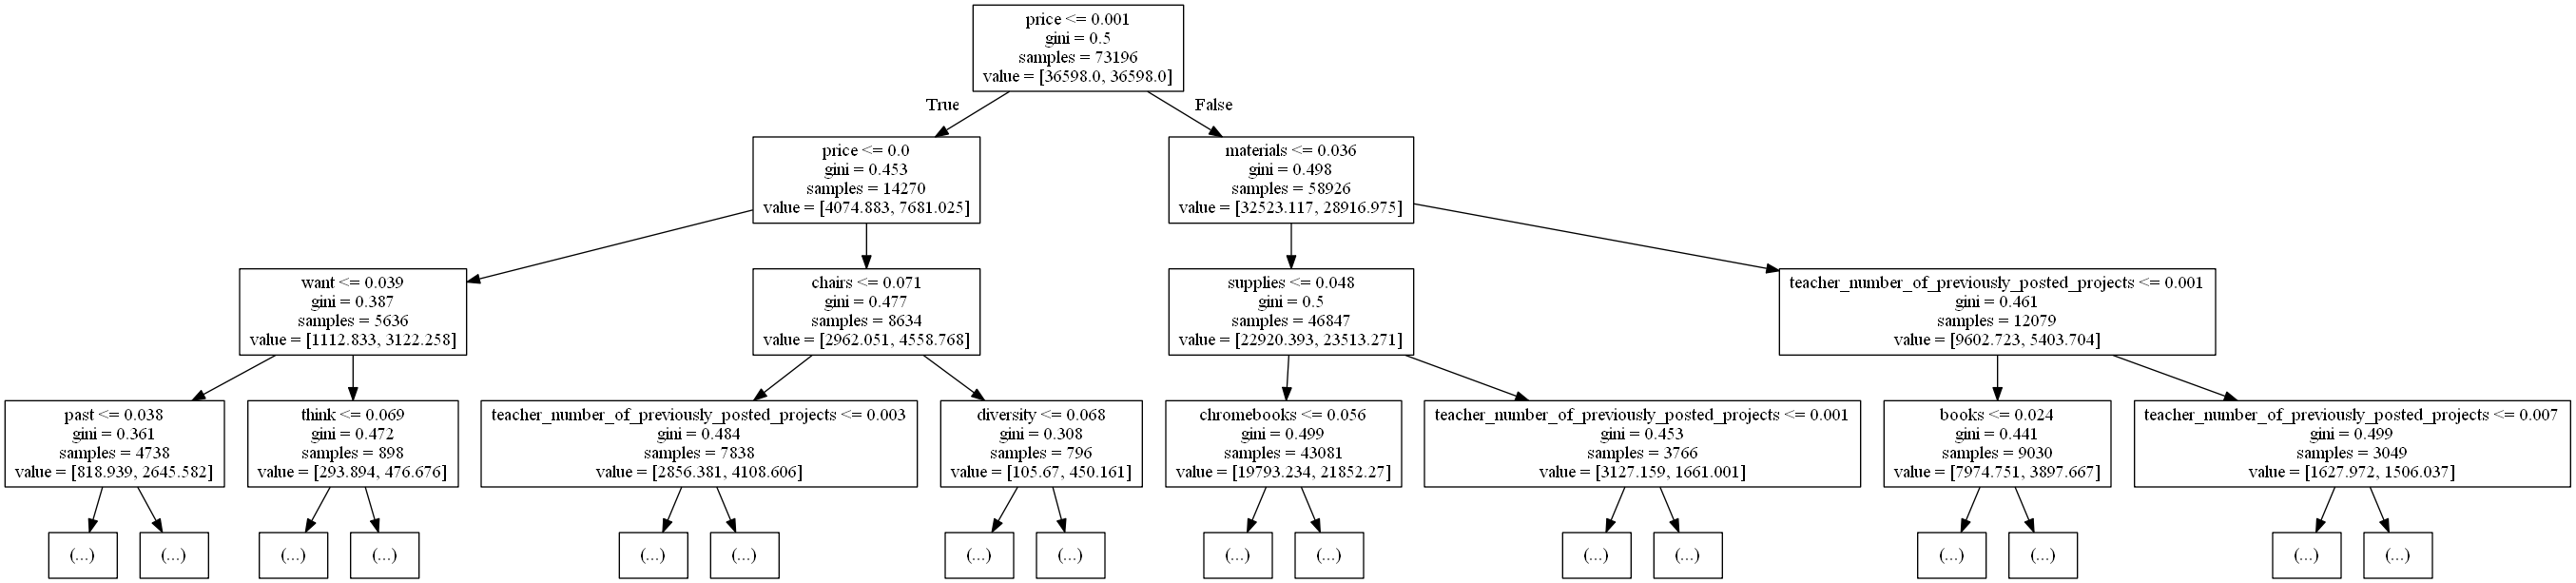

In [457]:
dot_data = StringIO()
export_graphviz(Base_Model, out_file=dot_data, max_depth=3,feature_names=feature_names_tfidf)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


### Print Flase positive data

In [458]:
X_test[(y_test == 0) & (y_test_pred == 1)]

Unnamed: 0       id                        teacher_id teacher_prefix  \
93896        89242  p109835  e7fa2a9caf5ec797495251ee12ff6487            Ms.   
107986       10311  p156887  4500b00e848aa215198c2830a9d91b34            Ms.   
41470        90285  p235852  51f3e2c20ac26513414947c4a89305f7           Mrs.   
22624       124874  p063678  b15057e951db26dae89c1f5f86dac5f0           Mrs.   
25398       110769  p115961  5f2f7d905770a3e795d21837ef54b351            Ms.   
41598       172895  p230487  577cd37058edffe77baddf556ac3f25d           Mrs.   
48517         8834  p114247  3854afc2cba285a9067ced1342ae310b           Mrs.   
85356       174230  p226825  1e50a13d04c3914049a02b392fd7f68d           Mrs.   
10547       171582  p065223  9fc2984bf7db2a38ec307c5ddfee794c            Mr.   
90123       172714  p023813  e5b218e62fa9e94e9f1de0c8dd0a9e54            Mr.   
88467          852  p203151  6245ba5a297bd4ab0fc381039fe6d50e           Mrs.   
45334       177731  p186342  4182937d001d608152554116728d3023            Ms.   
94537       107694  p096093  fd4c5e51dac19fb3cc5b11d2693cb099           Mrs.   
27203       145776  p174259  4c3a596671d05007153deba068ac35ce            Ms.   
40032       169442  p017259  07837cd0027d0f84bcf16c86e3709120            Ms.   
49542        77797  p002133  2ee6030943742d15e4b5305092154a5d           Mrs.   
108149       95433  p049932  e7a2e9a3312207fd60577f5edeaf64b9           Mrs.   
71537        38428  p201915  32ca2e51228c7c8da653fa5e78862d08           Mrs.   
51283        97470  p202733  55a329e004ec89504345418bc0e672bf           Mrs.   
44910       151667  p074797  81347c829fa0c1b6b8d3611f6dc9074c           Mrs.   
106660       79177  p054994  3f8ac99b23f3728b8d092518f148fd40        Teacher   
19311         8477  p162826  50e52e4bcb406a67e42dbc2fe7e21c14        Teacher   
98042       139211  p001965  944f2464c593e54e03ad2846425ed866           Mrs.   
106421       22395  p126388  a56d1002b45c5950dd265763992b4317        Teacher   
23591        30196  p227241  52f6fdd169754a55f1738cb6acecdd23            Ms.   
41733       170108  p083891  befcc2ec04adbad0f4b5a29e17122f38           Mrs.   
79361        14867  p211394  8795fb34de27f36c1a11241455abc614           Mrs.   
44019        49148  p122905  35dc03fcbf518eb4c9cc6899965aaba8            Ms.   
70744        18299  p030622  3eba546f4a1a010adabbdd63f6f2f662           Mrs.   
49003       169496  p160835  464d2874c46ac3e51c5b2da2a9aadd18            Ms.   
57775       182047  p087335  3c75dbb521bfd08fe40e0210aafb8523            Ms.   
11312        93686  p058973  c50f2d15d47e87f35e57c51a12b55936           Mrs.   
41169       164469  p018818  407c21d23cc8a78da44070cfcc138557           Mrs.   
37750        47071  p060088  719cbbad4f2c7b9217bfdb8d20e7f173           Mrs.   
81556       127019  p072370  3b10caf0ad6113ac0384e5475144e784            Ms.   
97014        69503  p127210  e7e91a7d9273986da47a7e5d416db886            Ms.   
20946       144179  p224389  3473b79b18da97bd5f65bdf22ceb9e20            Ms.   
1717        103471  p193581  51b742931d76f114ca78878e4ee517ee           Mrs.   
86476       146694  p164305  f1abaa2a68517621843555428f26caf7           Mrs.   
653         169181  p218463  6121f691268591f1c377157075190cc5            Mr.   
25852        38835  p096281  6075ed68e21bc5229c97325de2eb0e84           Mrs.   

       school_state                Date project_grade_category  \
93896            NY 2017-02-23 11:26:30          Grades_PreK_2   
107986           AZ 2017-04-24 19:56:35             Grades_3_5   
41470            AZ 2016-09-01 11:12:18          Grades_PreK_2   
22624            TX 2016-08-03 19:09:48          Grades_PreK_2   
25398            SC 2016-08-07 17:17:45          Grades_PreK_2   
41598            CA 2016-09-01 12:44:41            Grades_9_12   
48517            LA 2016-09-14 18:46:16          Grades_PreK_2   
85356            VA 2017-01-23 07:56:17          Grades_PreK_2   
10547            UT 2016-06-23 14:27:03             G

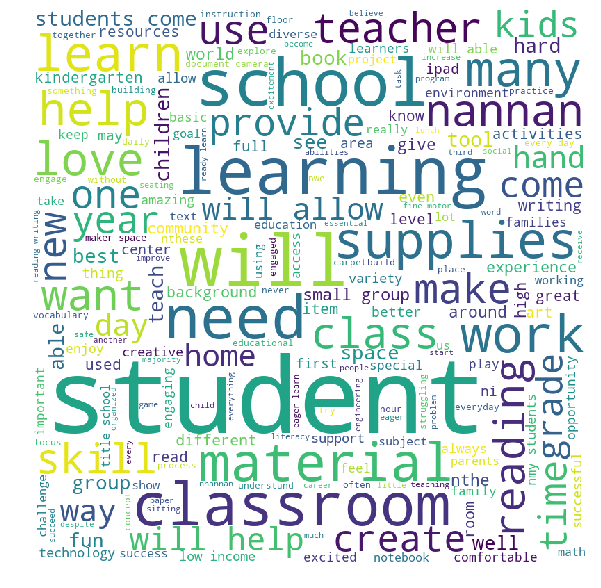

In [459]:
#############################################################

# Copied from geeks for geeksforgeeks
# https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

df = X_test[(y_test == 0) & (y_test_pred == 1)]
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.essay: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
#####################################

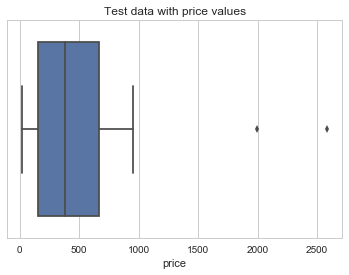

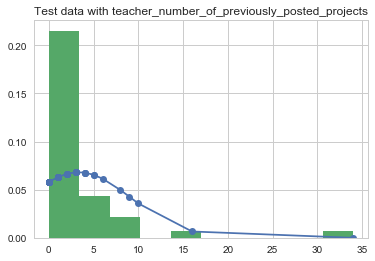

In [460]:
df.head()
sns.set(style="whitegrid")
sns.boxplot(x='price',data=df)
plt.title('Test data with price values')
plt.show()
################
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
h = df["teacher_number_of_previously_posted_projects"]
h = h.sort_values()
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
pl.hist(h, normed = True)
plt.title('Test data with teacher_number_of_previously_posted_projects')
plt.show()

### Summary on Price
#### 1) 75% of Flase positive points are less than 600
##### 2) median with 300
### Summary on of previously posted projects
#### 1) Most of the FP are less than 10


<h2>2.3 DT avgw2v </h2>

In [461]:
# Please write all the code with proper documentation

X_tr_avg_w2v = hstack((avg_w2v_vector_X_Train_essay,avg_w2v_vector_X_Train_Title,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,X_train_CC_ohe,X_train_SC_ohe,X_train_price_norm,X_train_previously_posted_norm)).tocsr()
X_te_avg_w2v = hstack((avg_w2v_vector_X_test_essay,avg_w2v_vector_X_test_Title,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_CC_ohe,X_test_SC_ohe, X_test_price_norm, X_test_previously_posted_norm)).tocsr()
               
print("Final Data matrix")
print(X_tr_avg_w2v.shape, y_train.shape)
print(X_te_avg_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 701) (73196,)
(36052, 701) (36052,)


In [462]:
Base_Model = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}]
grid_search_avgw2v = GridSearchCV(estimator = Base_Model, param_grid = parameters, scoring = 'roc_auc', cv = 10, n_jobs = -1,return_train_score= True)
grid_search_avgw2v = grid_search_avgw2v.fit(X_tr_avg_w2v, y_train)


In [463]:
grid_search_avgw2v.best_params_

{'max_depth': 5, 'min_samples_split': 500}

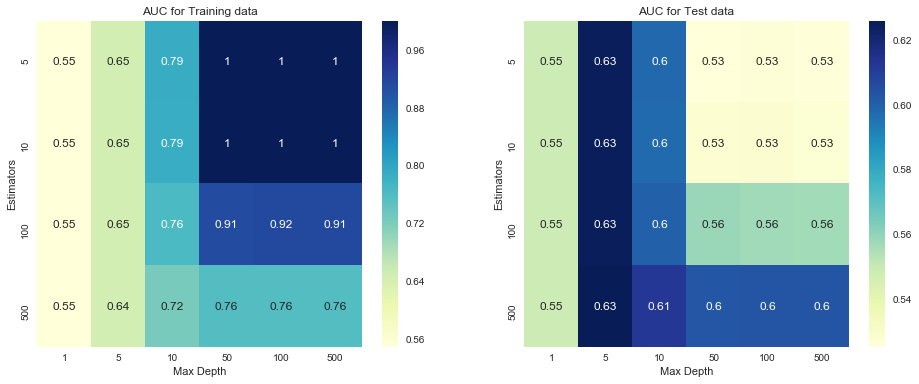

In [484]:
#Plot heat map for train and CV data
Plot_Heatmap(grid_search_avgw2v)

In [464]:
#Chosen best hyper parameter from heat map
Depth =  5
Samplestosplit = 500

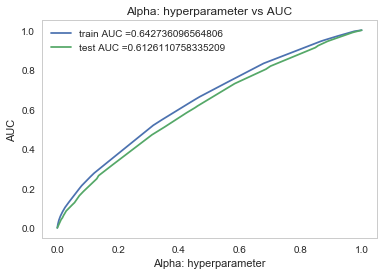

In [465]:
#Tran the model to find best Train/Test 
Threshold_Values = Chose_Best_Hyperparam(Depth, Samplestosplit, X_tr_avg_w2v, X_te_avg_w2v)

the maximum value of tpr*(1-fpr) 0.3589641456723999 for threshold 0.495


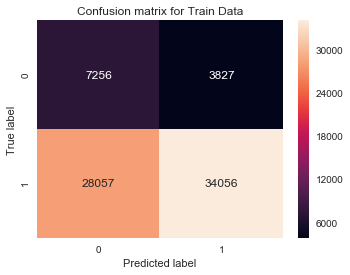

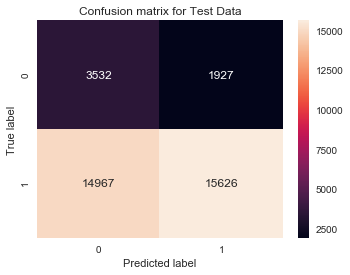

In [466]:
#Plot Confusion matrix train vs test
Plot_Confusion_Matrix_Train_Test(Threshold_Values)

<h2>2.4 DT tfidf_w2v </h2>

In [467]:
X_tr_tfidf_w2v = hstack((tfidf_w2v_vectors_X_train_essay,tfidf_w2v_vectors_X_train_title,X_train_state_ohe,X_train_teacher_ohe, X_train_grade_ohe,X_train_CC_ohe,X_train_SC_ohe,X_train_price_norm,X_train_previously_posted_norm)).tocsr()
X_te_tfidf_w2v = hstack((tfidf_w2v_vectors_X_test_essay,tfidf_w2v_vectors_X_test_Title,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_CC_ohe,X_test_SC_ohe, X_test_price_norm, X_test_previously_posted_norm)).tocsr()              

print("Final Data matrix")
print(X_tr_tfidf_w2v.shape, y_train.shape)
print(X_te_tfidf_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 701) (73196,)
(36052, 701) (36052,)


In [468]:
Base_Model = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}]
grid_search_tfidf_w2v = GridSearchCV(estimator = Base_Model, param_grid = parameters, scoring = 'roc_auc', cv = 10, n_jobs = -1,return_train_score= True)
grid_search_tfidf_w2v = grid_search_tfidf_w2v.fit(X_tr_tfidf_w2v, y_train)

In [469]:
grid_search_tfidf_w2v.best_params_

{'max_depth': 5, 'min_samples_split': 100}

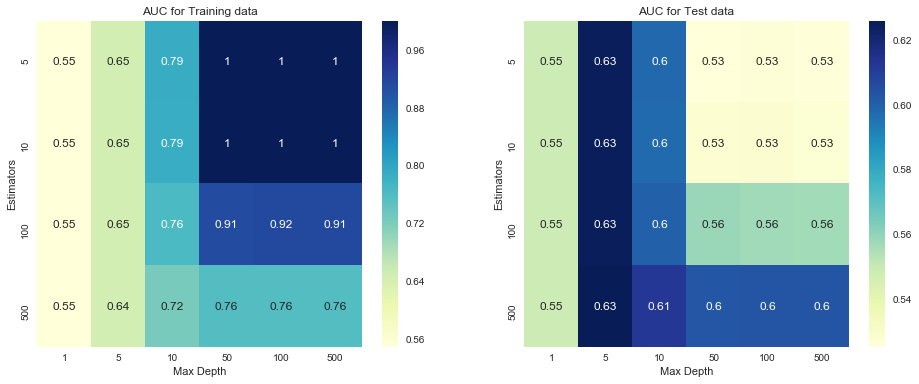

In [485]:
#Plot heat map for train and CV data
Plot_Heatmap(grid_search_avgw2v)

In [470]:
#Chosen best hyper parameter from heat map
Depth =  5
Samplestosplit = 500

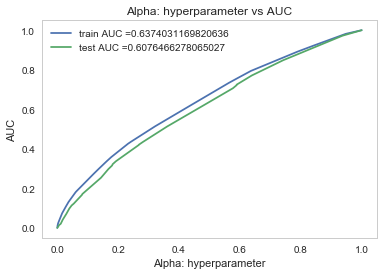

In [471]:
#Tran the model to find best Train/Test 
Threshold_Values = Chose_Best_Hyperparam(Depth, Samplestosplit, X_tr_tfidf_w2v, X_te_tfidf_w2v)

the maximum value of tpr*(1-fpr) 0.34865273266426444 for threshold 0.496


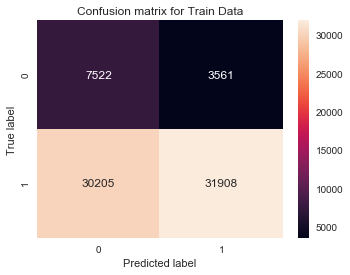

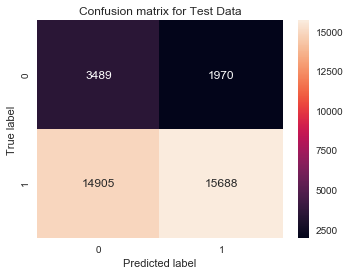

In [472]:
Plot_Confusion_Matrix_Train_Test(Threshold_Values)

### 2.5 Select 5K data points and Run on Linear SVM

In [473]:
#obtain most important features
indices = np.argsort(DT_Most_Important_TF_IDF)[-5000:]

In [474]:
indices.shape

(5000,)

In [475]:
X_tr_TFIDF_New  = X_tr_TFIDF [:, indices] 
X_te_TFIDF_New  = X_te_TFIDF [:, indices]

In [476]:
print(X_tr_TFIDF_New.shape)
print(X_te_TFIDF_New.shape)


(73196, 5000)
(36052, 5000)


In [477]:
#split the train data into Traint and CV
X_tr_TFIDF_New, X_cv_TFIDF_New, y_train, y_cv = train_test_split(X_tr_TFIDF_New, y_train, test_size=0.33, stratify=y_train)

In [478]:
### Linear SVM

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:12<00:00,  1.25s/it]


[0.7482759639998305, 0.7002337404171639, 0.6856336584000304, 0.6856382760300122, 0.6856382760300122, 0.6856382760300122, 0.6856382760300122, 0.6856382760300122]
[0.7022145834245472, 0.681140357090935, 0.668677894183798, 0.6686843508585897, 0.6686843508585897, 0.6686843508585897, 0.6686843508585897, 0.6686843508585897]


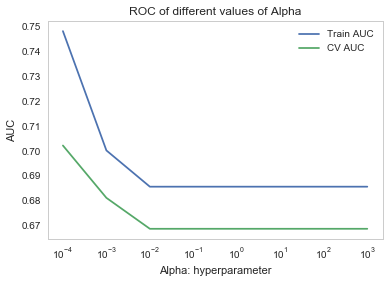

In [479]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
train_auc = []
cv_auc = []
regularization = [10**x for x in range(-4,4)]
for i in tqdm(regularization):
    Base_Model = SGDClassifier(loss='hinge',penalty='l2', alpha=i, average=False,  class_weight = 'balanced')
    LSVM = CalibratedClassifierCV(Base_Model)
    LSVM.fit(X_tr_TFIDF_New, y_train)
    y_train_pred = LSVM.predict_proba(X_tr_TFIDF_New)[:,1]   
    y_cv_pred = LSVM.predict_proba(X_cv_TFIDF_New)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

print(train_auc)
print(cv_auc)
plt.semilogx(regularization, train_auc, label='Train AUC' )
plt.semilogx(regularization, cv_auc, label='CV AUC')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC of different values of Alpha")
plt.grid()
plt.show()


In [480]:
best_hyperparam = 0.0001

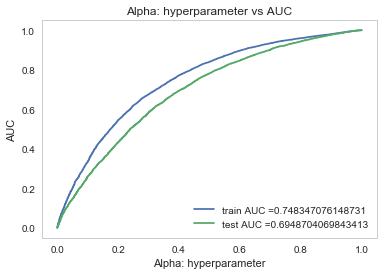

In [481]:
from sklearn.metrics import roc_curve, auc

Base_Model = SGDClassifier(loss='hinge',penalty='l2', alpha=best_hyperparam, average=False,  class_weight = 'balanced')
LSVM = CalibratedClassifierCV(Base_Model)

LSVM.fit(X_tr_TFIDF_New, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = LSVM.predict_proba(X_tr_TFIDF_New)[:,1]    
y_test_pred = LSVM.predict_proba(X_te_TFIDF_New)[:,

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Alpha: hyperparameter vs AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.47359322381730184 for threshold 0.837


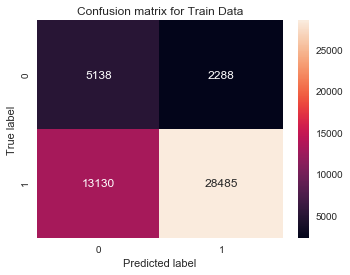

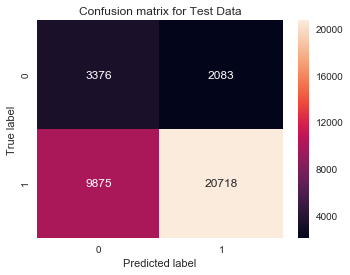

In [482]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
CMTrain = confusion_matrix(y_train,predict_with_best_t(y_train_pred, best_t))
plt.figure(figsize=(5.5,4))
sns.heatmap(CMTrain, annot=True, fmt='d')
plt.title('Confusion matrix for Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

CMTest = confusion_matrix(y_test,predict_with_best_t(y_test_pred, best_t))
plt.figure(figsize=(5.5,4))
sns.heatmap(CMTest, annot=True, fmt='d')
plt.title('Confusion matrix for Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<h1>3. Conclusions</h1>

In [486]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model","max_depth","max_split", "AUC"]
x.add_row(["BOW", "DT", 10, 500, 0.651])
x.add_row(["TFIDF","DT", 10, 500, 0.650])
x.add_row(["avgw2v","DT", 5, 500, 0.612])
x.add_row(["tfidf_w2v","DT",  5, 500, 0.61])
x.add_row(["tfidf_Most_Important", "Linear SVM", 0.0001, 'NA', 0.7 ])
print(x)

+----------------------+------------+-----------+-----------+-------+
|      Vectorizer      |   Model    | max_depth | max_split |  AUC  |
+----------------------+------------+-----------+-----------+-------+
|         BOW          |     DT     |     10    |    500    | 0.651 |
|        TFIDF         |     DT     |     10    |    500    |  0.65 |
|        avgw2v        |     DT     |     5     |    500    | 0.612 |
|      tfidf_w2v       |     DT     |     5     |    500    |  0.61 |
| tfidf_Most_Important | Linear SVM |   0.0001  |     NA    |  0.7  |
+----------------------+------------+-----------+-----------+-------+
